# Sprint データセット作成

## 1.このSprintについて

**Sprintの目的**
- データセットを作成し学習する
- データ拡張を行う

**どのように学ぶか**

自作のデータセットを作り、さらにデータ拡張も行なっていきます。

## 2.自作データセットの学習

自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

## 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [ ]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

In [ ]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# カレントディレクトリの変更


os.chdir('/content/drive/My Drive/term2_sprint18_dataset/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/term2_sprint18_dataset



## osを使用する場合

In [ ]:
path = './training' 
flist = os.listdir(path)

In [ ]:
!ls -a ./training

cat01.jpg  cat03.jpg  cat05.jpg  dog02.jpg  dog04.jpg  extendDatas
cat02.jpg  cat04.jpg  dog01.jpg  dog03.jpg  dog05.jpg  .ipynb_checkpoints


In [ ]:
flist

['dog01.jpg',
 'dog02.jpg',
 'cat01.jpg',
 'cat02.jpg',
 'cat05.jpg',
 'cat04.jpg',
 'cat03.jpg',
 'dog03.jpg',
 'dog04.jpg',
 'dog05.jpg',
 '.ipynb_checkpoints',
 'extendDatas']

## globを使用する場合

In [ ]:
img_list = glob.glob(path + '/*' + ".jpg")

In [ ]:
img_list 

['./training/dog01.jpg',
 './training/dog02.jpg',
 './training/cat01.jpg',
 './training/cat02.jpg',
 './training/cat05.jpg',
 './training/cat04.jpg',
 './training/cat03.jpg',
 './training/dog03.jpg',
 './training/dog04.jpg',
 './training/dog05.jpg']

# イメージのロード、配列化、リサイズ、データセット作成

In [ ]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,4))
cat_img_array = np.empty((0,224,224,4))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.

        # axisの追加
        dog_img = dog_img.reshape((1,224,224,4))

        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,4))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [ ]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 4)  cat_image:(5, 224, 224, 4)


# イメージの出力

In [ ]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.88627451, 0.68627451, 0.51764706, 1.        ],
        [0.89019608, 0.69019608, 0.52156863, 1.        ],
        [0.89019608, 0.69019608, 0.52156863, 1.        ],
        ...,
        [0.85882353, 0.56862745, 0.40392157, 1.        ],
        [0.84705882, 0.54901961, 0.39215686, 1.        ],
        [0.84705882, 0.55294118, 0.38039216, 1.        ]],

       [[0.89411765, 0.69411765, 0.5254902 , 1.        ],
        [0.88627451, 0.68627451, 0.51764706, 1.        ],
        [0.88627451, 0.69019608, 0.52156863, 1.        ],
        ...,
        [0.85490196, 0.56862745, 0.4       , 1.        ],
        [0.84705882, 0.55294118, 0.39215686, 1.        ],
        [0.84705882, 0.55294118, 0.38039216, 1.        ]],

       [[0.89411765, 0.69411765, 0.5254902 , 1.        ],
        [0.88627451, 0.69019608, 0.52156863, 1.        ],
        [0.88627451, 0.69803922, 0.52941176, 1.        ],
        ...,
        [0.85098039, 0.55686275, 0.39215686, 1.        ],
        [0.85098039, 0.556862

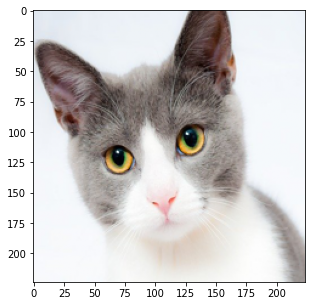

In [ ]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[4])

plt.show()

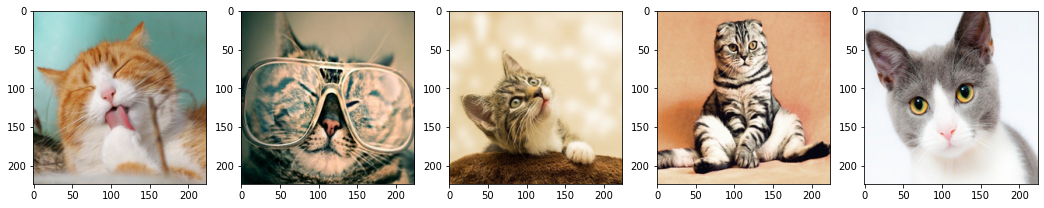

In [ ]:
plt.figure(figsize=(18,8))
for i, img in enumerate(cat_img_array):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
plt.show()

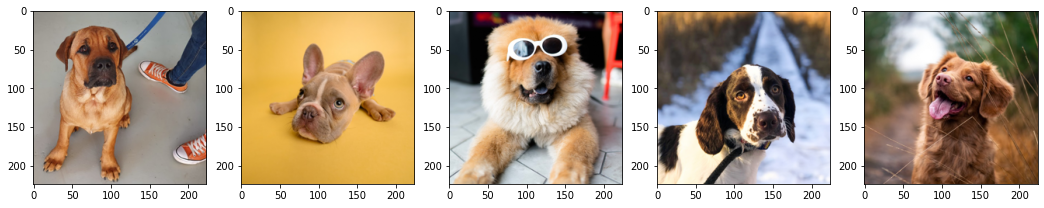

In [ ]:
plt.figure(figsize=(18,8))
for i, img in enumerate(dog_img_array):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
plt.show()

In [ ]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


<class 'PIL.Image.Image'>


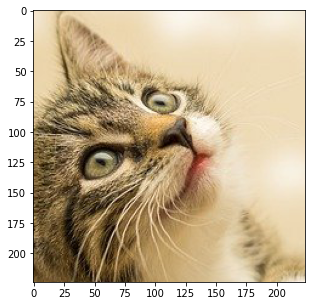

In [ ]:
img = Image.open(img_list[4])

img_new = crop_center(img, 224, 224)

print(type(img_new))

plt.imshow(img_new)

plt.show()

img.close()

## Kerasでも読み込んでみよう

In [ ]:
import keras

keras.__version__

'2.4.3'

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.8745098 , 0.78431374, 0.61960787],
        [0.8862745 , 0.78039217, 0.6117647 ],
        [0.8862745 , 0.7764706 , 0.61960787],
        ...,
        [0.92156863, 0.8627451 , 0.7490196 ],
        [0.92156863, 0.8627451 , 0.7490196 ],
        [0.92156863, 0.8627451 , 0.7490196 ]],

       [[0.8784314 , 0.7921569 , 0.6313726 ],
        [0.89411765, 0.79607844, 0.63529414],
        [0.89411765, 0.79607844, 0.63529414],
        ...,
        [0.9254902 , 0.8666667 , 0.7529412 ],
        [0.93333334, 0.8745098 , 0.7607843 ],
        [0.93333334, 0.8745098 , 0.7607843 ]],

       [[0.8862745 , 0.80784315, 0.6627451 ],
        [0.8980392 , 0.8039216 , 0.654902  ],
        [0.89411765, 0.80784315, 0.654902  ],
        ...,
        [0.93333334, 0.8745098 , 0.7607843 ],
        [0.9372549 , 0.8784314 , 0.7647059 ],
        [0.9372549 , 0.8784314 , 0.7647059 ]],

       ...,

       [[0.36862746, 0.21568628, 0.0627451 ],
        [0.627451  , 0.45490196, 0.27058825],
        [0.5294118 , 0

<class 'PIL.Image.Image'>


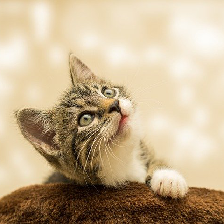

In [ ]:
print(type(img_keras))

img_keras

## Resizeについて

In [ ]:
import cv2

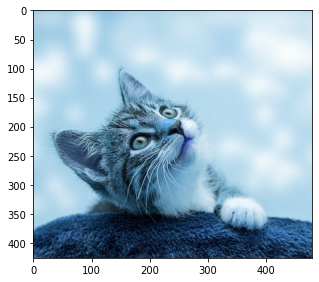

In [ ]:
# 元のサイズの画像

img = cv2.imread(img_list[4])

plt.imshow(img)

plt.show()

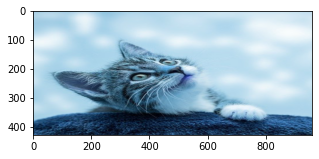

In [ ]:
#plt.rcParams['figure.figsize'] = (10.0, 10.0)

img = cv2.imread(img_list[4])

# 横幅2倍にしてみる
img = cv2.resize(img, None, fx = 2, fy = 1)

plt.imshow(img)

plt.show()

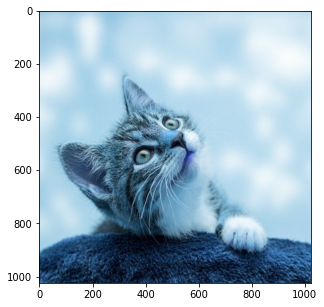

In [ ]:
img = cv2.imread(img_list[4])


# cv2でリサイズ　ピクセル補間の方法も指定できる
'''
cv2.INTER_NEAREST :最近傍補間
cv2.INTER_LINEAR :双線形補間（拡大むき）
cv2.INTER_AREA :平均画素法。モアレを軽減させる内挿（縮小むき）
cv2.INTER_CUBIC:4×4 の近傍領域を利用するバイキュービック補間（拡大むき）
cv2.INTER_LANCZOS4:8×8 の近傍領域を利用する Lanczos法の補間

下に行くほど計算時間がかかる



https://www.tech-tech.xyz/opecv_resize.html

http://tessy.org/wiki/index.php?%B2%E8%C1%FC%A4%CE%A5%EA%A5%B5%A5%A4%A5%BA

https://github.com/ArunJayan/OpenCV-Python/search?q=cv2.resize&unscoped_q=cv2.resize

http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

'''

img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

# openCVの色形式

## グレースケール 

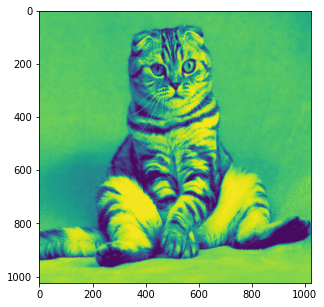

In [ ]:
# 第二引数を0にするとグレースケールで読み込める
plt.rcParams['figure.figsize'] = (5.0, 5.0)

img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

In [ ]:
img_array_1 = img_to_array(img) / 255.
img_array_1.shape

(1024, 1024, 1)

## BGRとRGB

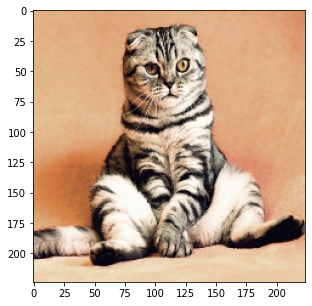

In [ ]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

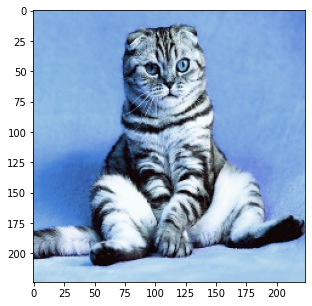

In [ ]:
# BGRチャネル

plt.imshow(img)

plt.show()

**自作データセットでの分類の学習**

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# trainデータとtestデータに分割
x_train = np.concatenate([cat_img_array[:-1], dog_img_array[:-1]])
x_test = np.concatenate([cat_img_array[-1][np.newaxis], dog_img_array[-1][np.newaxis]])
x_train.shape, x_test.shape

((8, 224, 224, 4), (2, 224, 224, 4))

In [ ]:
# 前処理
x_train, x_test = x_train / 255.0, x_test / 255.0
# x_train[0]

In [ ]:
 # ラベル付け：cat=0 dog=1
y_train, y_test = np.array([0, 0, 0, 0, 1, 1, 1, 1]), np.array([0, 1])
# y_train[0]

In [ ]:
# ワンホット処理
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.fit_transform(y_test[:, np.newaxis])
print(y_train_one_hot.shape) # (8, 2)
print(y_test_one_hot.shape) # (2, 2)

(8, 2)
(2, 2)


In [ ]:
K.clear_session()

In [ ]:
# モデル構築
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(224, 224, 4)))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                12845120  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 12,845,250
Trainable params: 12,845,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# モデルコンパイル
model.compile(loss="categorical_crossentropy",
             optimizer=tf.optimizers.Adam(learning_rate=0.01),
             metrics=["accuracy"])

# 学習
history = model.fit(x_train, y_train_one_hot,
                   batch_size=10,
                   epochs=30,
                   verbose=1)

Epoch 1/30
1/1 [==============================] - 1s 622ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 66ms/step - loss: 1.8701 - accuracy: 0.6250
Epoch 3/30
1/1 [==============================] - 0s 61ms/step - loss: 0.9050 - accuracy: 0.7500
Epoch 4/30
1/1 [==============================] - 0s 68ms/step - loss: 0.1798 - accuracy: 0.8750
Epoch 5/30
1/1 [==============================] - 0s 72ms/step - loss: 4.3641 - accuracy: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 69ms/step - loss: 0.2107 - accuracy: 0.8750
Epoch 7/30
1/1 [==============================] - 0s 67ms/step - loss: 1.6686 - accuracy: 0.3750
Epoch 8/30
1/1 [==============================] - 0s 68ms/step - loss: 0.5233 - accuracy: 0.7500
Epoch 9/30
1/1 [==============================] - 0s 67ms/step - loss: 0.3512 - accuracy: 0.7500
Epoch 10/30
1/1 [==============================] - 0s 84ms/step - loss: 0.3286 - accuracy: 0.8750
Epoch 11/30
1/1 [===========

In [ ]:
# 推定結果(確率)
y_pred_proba = model.predict(x_test)
# 確率を一番高い値のインデックスに変換
y_pred = np.argmax(y_pred_proba, axis=1)

In [ ]:
y_pred

array([0, 0])

In [ ]:
# 指標値計算
score = model.evaluate(x_test, y_test_one_hot, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 24ms/step - loss: 1.2099 - accuracy: 0.5000
Test loss: 1.209859848022461
Test accuracy: 0.5


**サンプル数が少ないせいか、うまく分類できていなかった**

## 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。


**《データ拡張のためのライブラリ》**


データ拡張にはalbumentationsなどがあります。


[albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries](https://github.com/albu/albumentations)


また、Kerasを使う場合はImageDataGeneratorも便利です。




**《データ拡張の効果の調査》**


データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

**albumentationsを使って画像の水増しをしてみる**

(参照先)[albumentations_examples/notebooks/example.ipynb](https://github.com/albumentations-team/albumentations_examples/blob/master/notebooks/example.ipynb)

[albumentations_examples/notebooks/example_weather_transforms.ipynb](https://github.com/albumentations-team/albumentations_examples/blob/master/notebooks/example_weather_transforms.ipynb)

In [ ]:
import albumentations as A
import random

In [ ]:
# AttributeError: module 'albumentations' has no attribute 'RandomRain'対策
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-y_s6s_vt
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-y_s6s_vt
     |████████████████████████████████| 952kB 4.3MB/s 
  Created wheel for albumentations: filename=albumentations-0.5.2-cp37-none-any.whl size=88322 sha256=a28fa370ed28e913dbb2649dea917943d8bed274413abf6c80149d2e757b8c05
  Stored in directory: /tmp/pip-ephem-wheel-cache-30amtntw/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
# Define the visualization function
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

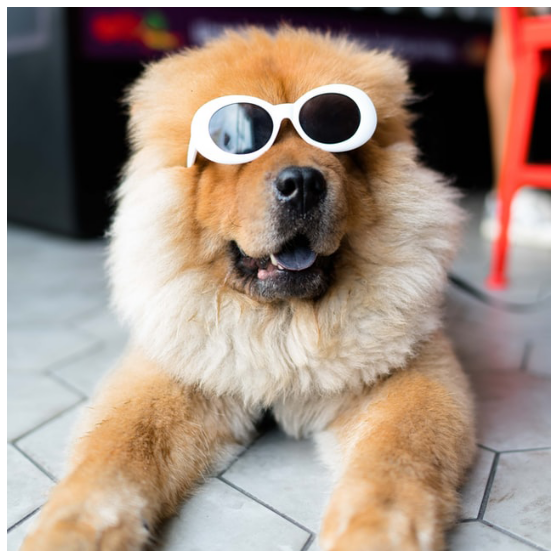

In [ ]:
# Read the image from the disk and convert it from the BGR color space to the RGB color space
image = cv2.imread('training/dog03.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

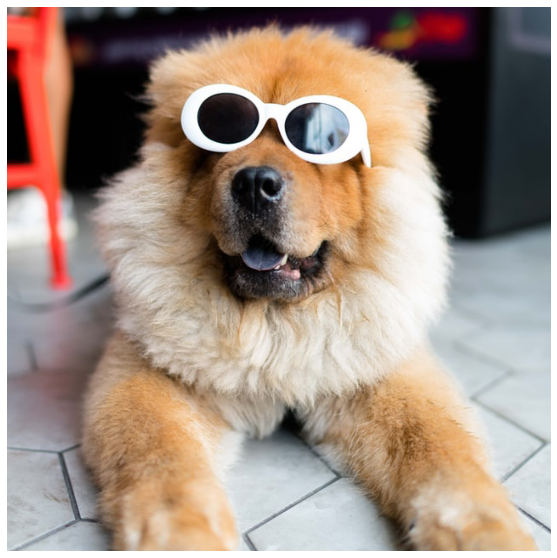

In [ ]:
# Define a single augmentation, pass the image to it and receive the augmented image
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

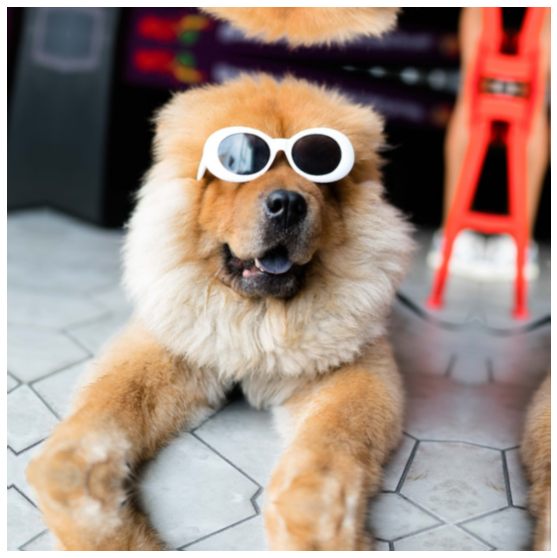

In [ ]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])
random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

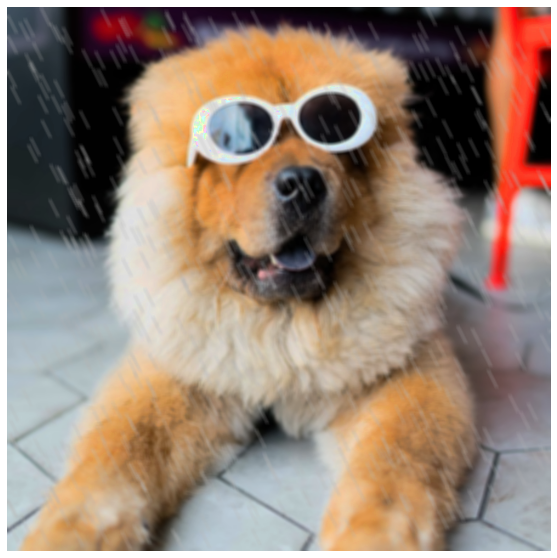

In [ ]:
transform = A.Compose(
    [A.RandomRain(brightness_coefficient=0.9, drop_width=1, blur_value=5, p=1)],
)
random.seed(7)
transformed = transform(image=image)
visualize(transformed['image'])

**KerasのImageDataGeneratorを使ってみる**

(参照先)[[ keras ] ImageDataGenerator で画像データを加工して増やす( データ拡張 )](http://wild-data-chase.com/index.php/2019/02/04/post-370/)

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 前準備
path      = "training/" # 読み込み画像へのpath
pic_name  = "dog03" # 画像の名称
jpg       = ".jpg" # 拡張子
save_path = "training/extendDatas/" # 生成された画像の格納path
os.makedirs(save_path, exist_ok=True) # 格納先ディレクトリが存在しなければ作成する

In [ ]:
# テスト用画像の読み込み
img = image.load_img(path + pic_name + jpg)

# 画像の配列化
img = np.array(img)

# 配列を四次元に整形
print("整形前の配列shape : {}".format(img.shape))
print("( 四次元配列でないとジェネレータに渡せないので、np.newaxisで次元追加 )")
img = img[np.newaxis]
print("追加後shape      : {}".format(img.shape))

整形前の配列shape : (640, 640, 3)
( 四次元配列でないとジェネレータに渡せないので、np.newaxisで次元追加 )
追加後shape      : (1, 640, 640, 3)


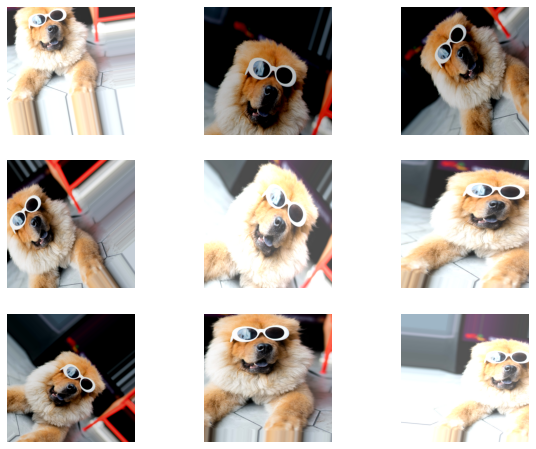

In [ ]:
# ジェネレータの定義
# データ拡張のパターンを指定する
glasses_gen = ImageDataGenerator(rotation_range    = 50,  # 回転角度の変更域の指定
                               width_shift_range   = 0.3, # 水平方向への移動域の指定
                               height_shift_range  = 0.3, # 垂直方向への移動域の指定
                               shear_range         = 0.1, # 傾斜角度の変更域の指定
                               zoom_range          = 0.3, # 拡大率の変更域の指定
                               channel_shift_range = 100, # チャンネル変化の指定
                               
                              )
 
# ジェネレータを生成
gen = glasses_gen.flow(img, 
                     batch_size  = 1,         # 起動バッチ数の指定。今回は画像1枚なので1
                     save_to_dir = save_path, # 保存先ディレクトリのpath
                     save_format = "jpg"      # 保存形式の指定
                    )
 
 
plt.figure(figsize=(10,8))  # 表示画像サイズ

# 9枚の画像を生成する
for i in range(9):
 
    # ジェネレータにおけるイテレータを進める
    batches = next(gen)
    
    # 1次元目は次元合わせだったので読み飛ばす。
    # 画像として表示するために、floatからuint8に変換する。
    g_img = batches[0].astype(np.uint8)
 
    # matplotlib.pyplot.subplot
    #  ... 一つの図の中に複数のイメージを格納したいときに用いる。
    #      引数は前から、行数、列数、何番目のプロットとして表示するかの指定。
    #      下の記述で言えば、 3x3 の表示枠を一つの図中に用意し、順番に表示データを当て込んでいる。
    plt.subplot(3, 3, i+1)
    plt.imshow(g_img)
    
    # matplotlib.pyplot.axis
    # ... 座標軸を表示するかどうかを指定する。off 指定で表示されなくなる。
    plt.axis('off')

**考察：albumentationsには画像の回転・反転以外、RandomRain(雨)、RandomSnow(雪)等多くの効果も選べる。KerasのImageDataGeneratorは画像の回転や拡大縮小、移動等ができるが、効果の選択範囲はalbumentationsのほうが広そう。**

## 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。


[tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images](https://github.com/tzutalin/labelImg)

**ローカルでLabelImgを用いてバウンディングボックスのアノテーションを行う**

## 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。

**画像1**

(参照先)[albumentations_examples/notebooks/example_bboxes.ipynb](https://github.com/albumentations-team/albumentations_examples/blob/master/notebooks/example_bboxes.ipynb)

In [30]:
# Define functions to visualize bounding boxes and class labels on an image

BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [31]:
# Load the image from the disk

image = cv2.imread("training/dog03.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [32]:
# Define two bounding boxes with coordinates and class labels

bboxes = [[123, 25, 421, 439]]
category_ids = [18]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {18: 'dog'}

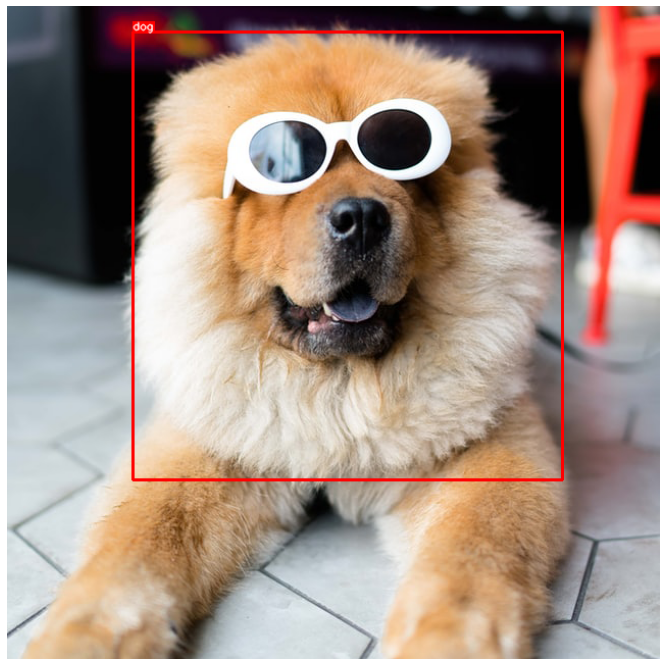

In [33]:
# Visuaize the original image with bounding boxes
visualize(image, bboxes, category_ids, category_id_to_name)

In [34]:
# Define the visualization function
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

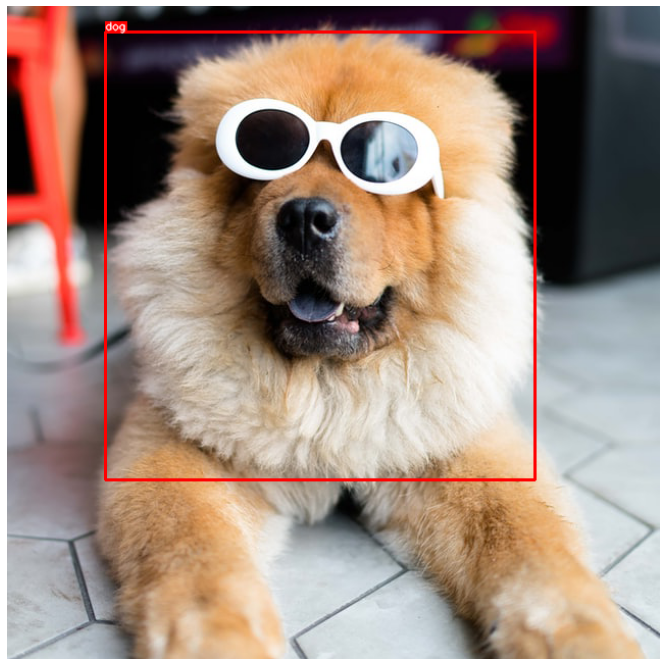

In [35]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [36]:
# Define a complex augmentation piepline
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

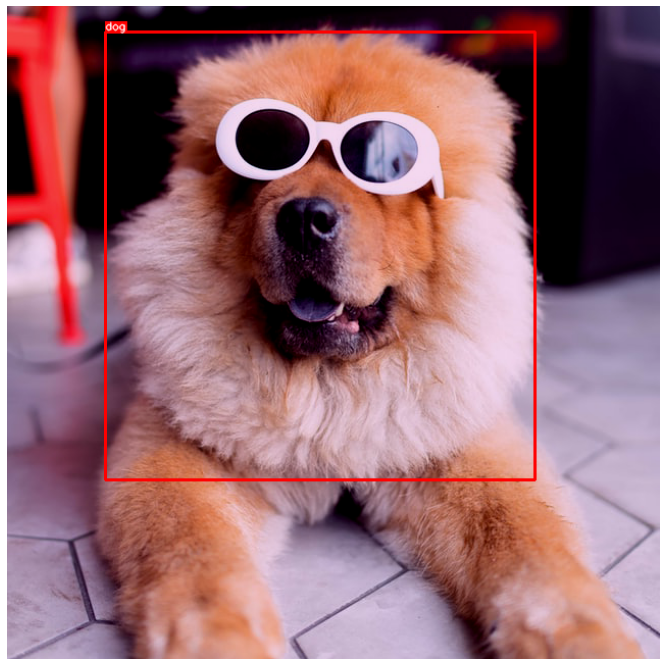

In [37]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

**画像2**

LabelImgで生成したXML(Extensible Markup Language:「拡張可能なマーク付け言語」)ファイルから座標データの抽出

(参照先)[keras-yolo3/voc_annotation.py](https://github.com/qqwweee/keras-yolo3/blob/master/voc_annotation.py)

[xml.etree.ElementTree --- ElementTree XML API](https://docs.python.org/ja/3/library/xml.etree.elementtree.html)

In [41]:
import xml.etree.ElementTree as ET

in_file = open('training/cat05.xml')
tree = ET.parse(in_file) # XMLファイルを解析
root = tree.getroot() # XMLを取得

In [62]:
# バウンディングボックスの座標を取得
bbox = []
for i in range(4):
    bndbox = root[6][4][i].text # root[6][4]-> object > bndbox
    bbox.append(bndbox)

In [63]:
bbox # (xmin, ymin, xmax, ymax)

['27', '92', '331', '320']

In [42]:
image = cv2.imread('training/cat05.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [58]:
# Define two bounding boxes with coordinates and class labels

bboxes = [[int(bbox[0]), int(bbox[1]), int(bbox[2])-int(bbox[0]), int(bbox[3])-int(bbox[1])]]
category_ids = [17]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {17: 'cat'}

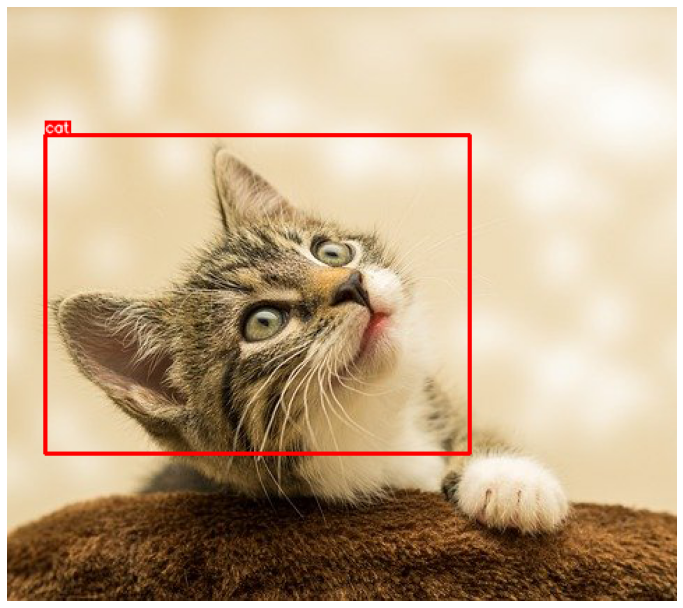

In [59]:
visualize(image, bboxes, category_ids, category_id_to_name)

In [60]:
# Define a complex augmentation piepline
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

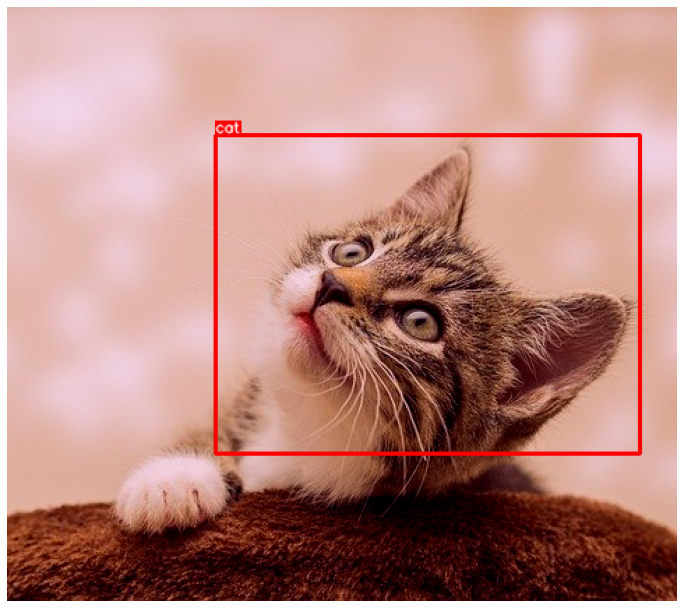

In [61]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)